
Please note September 19th entery in [LFETS Meating Notes](https://docs.google.com/document/d/1l_8dlIdJznsHb7cQ9t38HIvYR_ec9fbx6pr6vHvQvJs/edit?usp=sharing)




Numbers:
- Mixture ratio 1.2-1.4 approx. 1.3 O/F [Rocket Moonlighting](http://www.rocketmoonlighting.com/projects/pr56-igniter)
- Thrust 1.1 lbsf - Taken from [Roberts](http://www.watzlavick.com/robert/rocket/news/2011.html) rocket Project
- Bob's injector mass flow rate is $0.008 \frac{lb}{sec}$
- Chamber pressure 135 psig (NTM)

See Huzel & Huang for

Mass Flow Rate:
*$\dot{m}\approx0.005\dot{m}_{main}$  (Pg 9, 140)

LFRE Design documentation: 
- Mass flow rate $ \dot{m} = 2.06 \frac{lbm}{s}$
 - $\therefore \ \ \dot{m}_{igniter} = (2.06 * .005)\frac{lbm}{s} = 0.0103 \frac{lbm}{s} $


Exit Velocity:
$V_{e} = \sqrt{\frac{2g\gamma}{\gamma-1}RT_{c_{ns}}\bigg[1-\bigg(\frac{P_{e}}{P_{c_{ns}}}\bigg)\bigg]^\frac{\gamma-1}{\gamma}} $  (HH Pg. 9)


*Note that $\dot{w}$ is split between propellants based on mixture ratio

References:

(HH)
- Modern Engineering for Design of Liquid-Propellant Rocket Engines, Huzel & Huang

(NTM)
- NASA Technical Memorandum 106493 - Hydrogen-Oxygen Torch Igniter





# Data Used for calculations

[Isopropanol](http://www.chemicalbook.com/ChemicalProductProperty_EN_CB8854102.htm) density $\rho_{ipa} = 786 \frac{kg}{m^3} \ \rightarrow \ 49.068 \frac{lbm}{ft^3} $

Water density $ = \rho _{h20} = 62.3 \frac{lbm}{ft^3}$

$\dot{m}_{igniter} = 0.0103 \frac{lbm}{s} $



In [7]:
import math
from mpmath import *

#Define Constants
g     = 32.2  # gravitational constant in ft/s^2
C_speed_sound_GOX  = 1067.55   #Speed of sound in GOX in (ft/sec) 
gass_constant_gox   = 1554     # (ft*lb)/(slug * R)
Temp_o              =  525     # ~65 F in Rankine   

#initial inputs
density_ipa  = 49.068    # Density of IPA in (lbm/ft^3)
density_H2O  = 62.30     # Density of water in (lbm/ft^3)
density_GOX   = 0.0831     # (Engine) Density of Liquid Oxygen in (lbm/ft^3)
flowrate_GOX     = 0.9       # Engine oxygen flow rate in (lbm/s)
flowrate_Fuel_Engine     = 1.16      # Engine Fuel flow rate in (lbm/s)
flowrate_Igniter    = .005      # percent of main engine flow %
flowrate_mass    = 0.0103    # Mass flow rate ign (lbm/s)
#chamber_pressure_igniter     = 135       # Igniter Chamber pressure (psi)
tube_125 = 0.125     # 1/8th in Tube diameter (in)
diameter_igniter_nozzle = 0.108 #diameter of the nozzle on the igniter (in)
oxfuel_ratio = 1.2 # Oxygen/fuel mass ratio from LFE_2015
gox_cp = 0.918  #gaseous oxygen Cp value, kj/(kg*k)
gox_cv = 0.656 #gaseous oxygen Cv value, kj/(kg*k)
specific_heat_GOX = 1.395 #specific heat ratio Cp/Cv (dimensionless)

# initial calculated values for equations:

flowrate_mass_O = flowrate_Igniter * flowrate_GOX   # Oxygen mass flow rate into igniter (lbm/s)s
flowrate_mass_F = flowrate_Igniter * flowrate_Fuel_Engine   # Fuel mass flow rate into igniter (lbm/s)
density_fuel = (.3 * density_H2O) + (.7 * density_ipa) # density of Fuel in lbm/ft^3

#oxfuel_ratio = flowrate_GOX / flowrate_Fuel_Engine # O/F ratio

tube_radius = tube_125/24
area_125 = pi() * (tube_radius)**2 # in ft^2 
veloctiy_flow_fuel = flowrate_mass_F / (density_fuel * area_125) #Needed Fuel flow velocity (ft/s)
velocity_flow_GOX = flowrate_mass_O / (density_GOX *area_125) #Needed GOX flow velocity
machGOX = velocity_flow_GOX / C_speed_sound_GOX #Mach # for GOX flow
specific_gravity_fuel = density_fuel / density_H2O # specific gravity
velocity_flow_fuel_engine = 1 / density_fuel * (flowrate_Igniter*flowrate_Fuel_Engine) * 60 #convert to per min, units of ft^3 / min
flowrate_fuel_gpm = velocity_flow_fuel_engine * 7.48052 # convert ft^3 to US Gallons

print("70 percent IPA Fuel density,   density_fuel   = %.2f lbm/ft^3" % density_fuel)
print("Fuel Specific Gravity,         specific_gravity_fuel     = %.2f " %specific_gravity_fuel)
#print("Oxygen Fuel Ratio O/F,         oxfuel_ratio      = %.2f " % oxfuel_ratio)
print("Total Igniter mass flow rate,  flowrate_mass    = %.4f lbm/sec" % flowrate_mass)
print("Igniter Fuel mass flow rate,   flowrate_mass_F  = %.4f lbm/sec" % flowrate_mass_F)
print("Igniter Oxygen mass flow rate, flowrate_mass_O  = %.4f lbm/sec" % flowrate_mass_O)
#print("Igniter Chamber Pressure,      chamber_pressure_igniter     = %.2f psig" % chamber_pressure_igniter)
print("1/8th in tube Flow Area        area_125 = %.2e ft^2" % area_125)
print("Fuel Flow Velocity,            veloctiy_flow_fuel   = %.2f ft/sec" % veloctiy_flow_fuel)
print("GOX Flow Velocity,             velocity_flow_GOX    = %.2f ft/sec" % velocity_flow_GOX)
print("GOX Mach number,               machGOX = %.2f " % machGOX )
print("Fuel flow rate in gpm          flowrate_fuel_gpm    = %.4f gpm" %flowrate_fuel_gpm)
print("Gaseous oxygen specific heat   specific_heat_GOX   = %.4f gpm" %specific_heat_GOX)

70 percent IPA Fuel density,   density_fuel   = 53.04 lbm/ft^3
Fuel Specific Gravity,         specific_gravity_fuel     = 0.85 
Total Igniter mass flow rate,  flowrate_mass    = 0.0103 lbm/sec
Igniter Fuel mass flow rate,   flowrate_mass_F  = 0.0058 lbm/sec
Igniter Oxygen mass flow rate, flowrate_mass_O  = 0.0045 lbm/sec
1/8th in tube Flow Area        area_125 = 8.52e-05 ft^2
Fuel Flow Velocity,            veloctiy_flow_fuel   = 1.28 ft/sec
GOX Flow Velocity,             velocity_flow_GOX    = 635.42 ft/sec
GOX Mach number,               machGOX = 0.60 
Fuel flow rate in gpm          flowrate_fuel_gpm    = 0.0491 gpm
Gaseous oxygen specific heat   specific_heat_GOX   = 1.3950 gpm


## Pressure Drop

### Governing equations:

$P_1 = P_2 + \gamma z_2 + \frac{1}{2}\rho(V^2_2 -V^2_1)+\gamma h_L$

$\Delta P = \frac{(\dot{m} \ / \ A \ C_D)}{\rho} $

### Assumptions for igniter calculations:

Incompressible fuel flow 

Compressible oxygen flow

Zero elevation change, so pressure head can be neglected $\therefore \rightarrow \gamma z_2 = 0$  

Fluid initially at rest $\therefore \rightarrow V^2_1 = 0$

Very short lenghts of tube, $\therefore$ Major Losses $= \ 0$

Minor losses $h_L = \sum K_L \frac{V^2}{2g}$ - Minor losses negligble with the exception of the fuel and oxygen metering orifices.

Mass Flow Rate $\dot{m} = \rho Q = \rho AV $ units in$ \frac{[slug]}{[s]}$ or $\frac{[kg]}{[s]}$

- where $Q$ is volume flow rate in $\frac{ft^3}{s}$ or $\frac{ft^3}{s}$ 
- $\therefore \ V = \frac{\dot{m}}{\rho A}$

### Working equations:

*Where:* 

$P_{1o} =$ Oxygen inlet pressure 

$P_{1f} =$ Fuel inlet pressure 

$P_{ch} =$ Igniter Chamber pressure 

$r    =$ O/F mixure ratio

$\dot{m} =$ Igniter mass flow rate

$\dot{m}_o =$ Oxygen mass flow rate

$\dot{m}_f =$ Fuel mass flow rate

$\rho_o =$ density of GOX

$\rho_f = $ density of fuel

$\gamma = $ Specific heat of Gaseous Oxygen

$C_d = $ Coefficient of discharge of metering orifice. Using 0.62 as a first approximation

$d = $ orifice diameter

$A_2 =$ orifice area

$D = $ pipe diameter

$A_f=A_o =$ Tube area for Fuel and Oxygen lines

## __GOX__ - *Gaseous Oxygen*

$\dot{m}_o = \frac{C_d}{\sqrt{1-(d/D)^4}} A_2\sqrt{\gamma\rho_o P_{1o}\left(\frac{2}{(\gamma + 1)}\right)^{\frac{\gamma+1}{\gamma-1}}} $

$P_{1o} = P_{ch} + \rho_o \frac{\left(\frac{r \dot{m}}{(r+1)}\frac{1}{\rho_o A_o} \right) ^2}{2}$

$\therefore \ P_{1o} = P_{ch} + \rho_o \frac{\left(\frac{\dot{m}_o}{\rho_o A_o} \right) ^2}{2}$

## __Fuel__ - *IPA*

$P_{1f} = P_{ch} + \rho_f \frac{\left(\frac{\dot{m}_f}{\rho_f A_f} \right) ^2}{2} + \frac{(\dot{m}_f \ / \ A_f \ C_D)}{\rho_f}$


## __Schematic of Igniter Test rig__ 

<img src="Igniter_Test_Stand_PID_2017.10.10.jpg", width=550, height=550 >

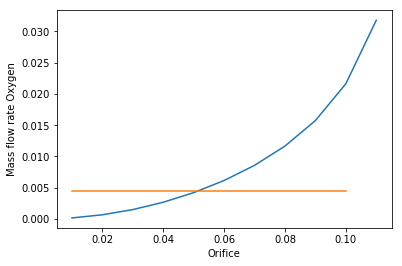

Needed Mass flow rate Oxygen,   flowrate_mass_O   = 0.00450 lbm/s
Mass flow rate Oxygen,                     q_mo   = 0.00456 lbm/s
Oxygen orifice diameter,     orifice_diameter_o   = 0.0520 in
Velocity pressure,             fuel_flow_energy   = 43.6664 psi


In [11]:
import math
from mpmath import *
import sympy as sympy
#from sympy.solvers import solveset
from sympy import *
sympy.init_printing(use_unicode=False, wrap_line=True)
import math
from matplotlib import pyplot as plt

# Pressure calculations for GOX orifice

#Controllable variables
pressure_inlet_GOX        = 300 # Oxygen set pressure at inlet
discharge_coefficient     = 0.62 # first approximation value for orifice plate discharge coefficient



q_mo = []
gox_orifice =[]

for x in range(1, 12):
    orifice_diameter= x/100
    gox_orifice.append(orifice_diameter)
    orifice_area    = 1/4*3.14159*orifice_diameter**2
    diameter_ratio_beta   = orifice_diameter/tube_125
    constant_c            = discharge_coefficient / (1-diameter_ratio_beta**4)**(1/2)
    q_mo.append(constant_c * orifice_area * 
            (specific_heat_GOX * density_GOX * pressure_inlet_GOX *
            (2/(specific_heat_GOX + 1))**((specific_heat_GOX + 1)/(specific_heat_GOX - 1)))**(1/2))
    #q_mo.append(q_mo)
    
    
y = [flowrate_mass_O, flowrate_mass_O]    
x = [.01, .1]

    
plt.plot(gox_orifice, q_mo)
plt.plot(x, y)
plt.ylabel('Mass flow rate Oxygen')
plt.xlabel('Orifice')
plt.show()

#orifice_diameter      = .08 # diameter of orifice
#orifice_area          = 1/4*pi()*orifice_diameter**2

#diameter_ratio_beta   = orifice_diameter/tube_125
#constant_c            = discharge_coefficient / (1-diameter_ratio_beta**4)**(1/2)

#pressure_inlet_fuel

#Previously defined variables
#area_125                # tube are
#density_GOX
#density_fuel
#flowrate_mass_O
#flowrate_mass_f
#velocity_flow_GOX
#veloctiy_flow_fuel
#specific_heat_GOX


#Solve for the diameter of orifice plate for oxygen. Will be different given different upstream pressures.
#with a desired mass flow rate we can rearrange the equation for oxygen mass flow rate to solve for
#the needed diameter.

#solving for mass flow rates using different orifice diameters:

orifice_diameter      = .052 # inch #55 drill bit size diameter of orifice
orifice_area          = 1/4*3.14159*orifice_diameter**2

diameter_ratio_beta   = orifice_diameter/tube_125
constant_c            = discharge_coefficient / (1-diameter_ratio_beta**4)**(1/2)

q_mo = constant_c * orifice_area * (specific_heat_GOX * density_GOX * pressure_inlet_GOX *
            (2/(specific_heat_GOX + 1))**((specific_heat_GOX + 1)/(specific_heat_GOX - 1)))**(1/2)



# Now to determine the pressure needed to have a fuel mass flow rate of .0058 lbm/s

fuel_flow_energy = density_fuel*(veloctiy_flow_fuel**2)/2





print("Needed Mass flow rate Oxygen,   flowrate_mass_O   = %.5f lbm/s" % flowrate_mass_O)

print("Mass flow rate Oxygen,                     q_mo   = %.5f lbm/s" % q_mo)

print("Oxygen orifice diameter,     orifice_diameter_o   = %.4f in" % orifice_diameter)

print("Fuel velocity head (psi),      fuel_flow_energy   = %.4f psi" % fuel_flow_energy)



In [5]:
# Need to input the KL variables prior to solving for inlet pressure. 

#1/8 in solinoid

cv1 = 0.045        #GPM take from Valve data sheet

#Calculations
pressure_drop1 = specific_gravity_fuel * (flowrate_mass_F / cv1)**2

#print("Flow Rate through Solinoid 1,   Qgpm = %.4f gpm" % Qgpm)
print("Pressure drop fuel Solinoid,      pdrop1 = %.4f psi" % pressure_drop1)

# Attempt to find Cv for orifice


Pressure drop fuel Solinoid,      pdrop1 = 0.0141 psi


In [ ]:
#Mixing chamber calculation
diameter_igniter_nozzle = 0.108 #diameter of the nozzle on the igniter (in)


$$$$